# Assignment 01: Python Functions and Numpy Vectorization
---

**Due Date:** Friday 09/05/2025 (by midnight)

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Jane Hacker

CWID-5: (Last 5 digits of cwid)

## Introduction 

In this assignment you will get some tasks to help familarize you with programming Python 
and creating vectorized NumPy functions.  

Even if you've used Python before, these exercises will help familarize you with functions you will
be using in this course, and a few basic concepts.

**Instructions**:

- You need to use the class development environment and make sure that you are pushing your assignments to your
  GitHub classroom and they are successfully passing the autograder.
- Avoid using for-loops and while loops, unless you are explicitly told to do so.
- Do not modify the `### TESTED FUNCTION [function name]` cells.  These cells call unit tests on the functions
  you are asked to write for these assignments.
- All functions you need to write should be placed into the `src/assginment_tasks.py` file.  Functions that are
  tested and graded are imported from there into this notebook.
  - For this assignment you have been given a stub function and documentation for the function.  In the future you will
    need to add in the function from scratch yourself for each task.
- After coding your function, run the `### TESTED FUNCTION` cell to determine if it is passing the assignment
  unit tests and that your result is correct.

**After this assignmeent you will**:
- Be able to use iPython Notebooks
- Be familiar with using our GitHub classroom workflow and the GitHub autograder for your assignments.
- Understand the concept of "broadcasting"
- Understand and be able to vectorize code.
- Have practiced writing Python and vectorized NumPy functions and operations.

Let's get started!

In [1]:
# The following ipython magic will reload changed file/modules.
# So when editing function in source code modules, you should
# be able to just rerun the cell, not restart the whole kernel.
%load_ext autoreload
%autoreload 2

In [2]:
# assignment wide imports go here, usually all of your imports for noteboosk should
# be put up at the top here, if they were not given to you at the start of the assignment
import math
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Import functions/moduls from this project.  We manually set the
# PYTHONPATH to append the location to search for this assignments
# functions to just ensure the imports are found
#import sys
#sys.path.append("../src")

# assignment function imports for doctests and github autograding
# these are required for assignment autograding
from assg_utils import run_unittests, run_doctests
from assg_tasks import basic_sigmoid
from assg_tasks import sigmoid
from assg_tasks import sigmoid_grad
from assg_tasks import standard_scalar
from assg_tasks import softmax
from assg_tasks import one_hot
from assg_tasks import rmse
from assg_tasks import mae

## Task 1: Building basic functions with `NumPy`

`NumPy` is the main package for scientific computing in Python. It is maintained by a large community (www.numpy.org). In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. You will need to know how to use these functions for future assignments.

### Task 1.1: sigmoid function, np.exp()

Before using np.exp(), you will use math.exp() to implement the sigmoid function. You will then see why np.exp() is preferable to math.exp().

**Task**: Implement the function named `basic_sigmoid()` that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$\text{sigmoid}(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="../figures/Sigmoid.png" style="width:500px;height:228px;">


In [4]:
#### TESTED FUNCTION basic_sigmoid()
run_unittests(['test_basic_sigmoid'])

res = basic_sigmoid(3)
print('basic_sigmoid(3) returned: %f' % res)

test_input_0 (test_assg_tasks.test_basic_sigmoid.test_input_0)
test_input_0 ... FAIL
test_input_3 (test_assg_tasks.test_basic_sigmoid.test_input_3)
test_input_3 ... FAIL
test_input_neg5 (test_assg_tasks.test_basic_sigmoid.test_input_neg5)
test_input_neg5 ... FAIL
test_using_math_library (test_assg_tasks.test_basic_sigmoid.test_using_math_library)
test_using_math_library ... FAIL

FAIL: test_input_0 (test_assg_tasks.test_basic_sigmoid.test_input_0)
test_input_0
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithW

basic_sigmoid(3) returned: 0.000000


Actually, we rarely use the "math" library in machine learning because the inputs of the functions are real numbers. In machine learning we mostly use matrices and vectors. This is why numpy is more useful.

For example, if you try and calculate the sigmoid for an array of values, you get an error.

In [5]:
# One reason why we use "numpy" instead of "math" in Deep Learning, "numpy" functions
# are vectorized by default
x = np.array([-5, 0, 3])
try:
    basic_sigmoid(x)
except TypeError:
    print('basic_sigmoid() threw a TypeError because it expects a single scalar value as input')
    

In fact, if $x = (x_1, x_2, ..., x_n)$ is a row vector then $np.exp(x)$ will apply the exponential function to every element of x. The output will thus be: $\text{np.exp}(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$ (e.g.
the numpy version of the `exp()` function is vectorized).

In [6]:
import numpy as np

# example of np.exp
x = np.array([-5, 0, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

[6.73794700e-03 1.00000000e+00 2.00855369e+01]


Furthermore, if x is a numpy vector, then a Python operation such as $s = x + 3$ or $s = \frac{1}{x}$ will output s as a vector of the same size as x.

In [7]:
# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

[4 5 6]


Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html). 

You can also create a new cell in the notebook and write `np.exp?` (for example) to get quick access to the documentation.

**Task**: Implement the sigmoid function using numpy so that your function is vectorized. 

**Instructions**: x could now be either a real number, a vector, or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices...) are called numpy arrays. You don't need to know more for now.


\begin{equation}
\text{For } x \in \mathbb{R}^n \text{,     } \text{sigmoid}(x) = \text{sigmoid}
\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = 
\begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}
\end{equation}


In [8]:
#### TESTED FUNCTION sigmoid()
run_unittests(['test_sigmoid'])

x = np.array([-5, 0, 3])
s = sigmoid(x)
print('sigmoid(s) returned:')
print(s)

test_input_list (test_assg_tasks.test_sigmoid.test_input_list)
test_input_list ... FAIL
test_input_matrix (test_assg_tasks.test_sigmoid.test_input_matrix)
test_input_matrix ... FAIL
test_input_scalar (test_assg_tasks.test_sigmoid.test_input_scalar)
test_input_scalar ... ERROR
test_input_vector (test_assg_tasks.test_sigmoid.test_input_vector)
test_input_vector ... FAIL

ERROR: test_input_scalar (test_assg_tasks.test_sigmoid.test_input_scalar)
test_input_scalar
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWa

sigmoid(s) returned:
[0]


If your vectorized implementation of the `sigmoid()` function is working,
the following cell should recreate the plot of the sigmod function
you were shown above.  

Uncomment the call to your `sigmoid()` function and to plot it to see if you are getting the expected results.

/tmp/ipykernel_1342/2743136378.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


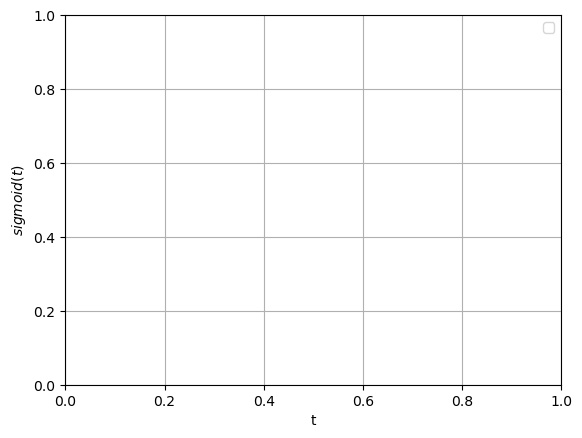

In [9]:
x = np.linspace(-8, 8, 100)
#t = sigmoid(x)
#plt.plot(x, t, 'r-', label=r'$sigmoid(t)=\frac{1}{1 + e^{-t}}$')
plt.grid()
plt.xlabel('t')
plt.ylabel(r'$sigmoid(t)$')
plt.legend();

You have completed two functions, `basic_sigmoid()` and `sigmoid()` at this point for the
first part of Task 1.  You should go ahead and create a commit and push it to your
GitHub Classroom repository now if your functions are working, and check that it passes the
assignment Autograder.

### Task 1.2: sigmoid gradient

As you will see in our class, you will need to compute gradients to optimize loss functions using backpropagation. Let's code your first gradient function.

**Task**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: 

\begin{equation}
\text{sigmoid\_grad}(x) = \text{sigmoid}(x) (1 - \text{sigmoid}(x))
\end{equation}


You often code this function in two steps:
1. Set s to be the sigmoid of x. You are required to reuse your `sigmoid(x)` function from the
   previous task to do this, e.g. don't repeat yourself.
3. Compute $\text{sigmoid\_grad}(x) = s(1-s)$

In [10]:
#### TESTED FUNCTION sigmoid_grad()
run_unittests(['test_sigmoid_grad'])

x = np.array([-5, 0, 3])
ds = sigmoid_grad(x)
print('sigmoid_grad(s) returned:')
print(ds)

test_input_list (test_assg_tasks.test_sigmoid_grad.test_input_list)
test_input_list ... FAIL
test_input_matrix (test_assg_tasks.test_sigmoid_grad.test_input_matrix)
test_input_matrix ... FAIL
test_input_scalar (test_assg_tasks.test_sigmoid_grad.test_input_scalar)
test_input_scalar ... ERROR
test_input_vector (test_assg_tasks.test_sigmoid_grad.test_input_vector)
test_input_vector ... FAIL

ERROR: test_input_scalar (test_assg_tasks.test_sigmoid_grad.test_input_scalar)
test_input_scalar
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py

sigmoid_grad(s) returned:
[0]


Once your `sigmod_grad()` function is passing your tests, you should create and push 
a commit of your Task 2.2 work to your GitHub classroom repository, and ensure that it is
passing tests in the autograder.

### Task 1.3: Feature Scaling of Sample Data

Another common task we need to do for Machine Learning is data normalization, where we scale numerical features of our data to have similar
ranges.  We will discuss in class two common methods of normalizing data, min-max scaling and standard scaling.  Normalizing data using standard
scaling is probably the most common technique, and has some advantages over min-max scaling.  

In ML, when we have a matrix of data, each row represents a separate sample of the data, and the columns are the measured features for the
collected data samples.

![Terminology, data has n samples as rows and m column features](../figures/data-samples-features.png)

In this example of the Iris dataset (that we will be using in this class), there are 150 samples, so `n = 150` rows are in the table.  There are `m = 4` separate
measured features for each flower sample (petal length, petal width, sepal length and sepal width).  The fifth column has a target label that is not a numerical feature and
is used for supervised training.

Typically the numerical input features will be represented as a numpy array, in the previous example the array would have a shape of `(150, 4)`, and would be represented like
the following:

\begin{equation}
\begin{bmatrix}
    x_1^{(1)}  && x_2^{(1)} && x_3^{(1)}  && x_4^{(1)}  \\
    x_1^{(2)}  && x_2^{(2)} && x_3^{(2)}  && x_4^{(2)}  \\
    \vdots && \vdots && \vdots && \vdots \\
    x_1^{(150)}  && x_2^{(150)} && x_3^{(150)}  && x_4^{(150)}  \\
\end{bmatrix}
\end{equation}

In order to perform standard feature scaling, we determine the average of each feature (column) of the data, and subtact each value in a column by the average.  This has
the effect of "centering" the data so that the data now has a mean value of 0.  We also divide each column by the standard deviation of the column, which has the effect
of normalizing the feature columns to all have a unit standard deviation (a standard deviation of 1).

You will often see a greek `mu` $\mu$ as representing the sample mean of a feature, and a greek `sigma` $\sigma$ to represent the sample standard deviation.  So for example, 
we can represent the standard scaling operation for the $j^{th}$ feature as:

\begin{equation}
x_j^` = \frac{x_j - \mu_j}{\sigma_j}
\end{equation}

Here $x_j$ is a vector (a column of our data matrix) consisting of the $j^{th}$ feature vales of all training examples, and $\mu_j$ and $\sigma_j$ are the sample mean and standard deviation
of this feature.

**Task**: Implement a function named `standard_scalar()` to perform this operation.  This function expects a matrix `x` of data of shape `(n, m)` with `n` rows of samples and `m` numerical column
features.  You are required to implement this function using vectorized NumPy operations.  You should calculate the `mean()` and `std()`  of each column/feature of `x` and perform the
centering and deviation normalization described.  The function should return a new copy of `x` that has been correctly normalized using standard feature scaling.

In [11]:
#### TESTED FUNCTION normalize_rows()
run_unittests(['test_standard_scalar'])

x = np.array(
    [[0,   3,   5,  3],
     [1,   6,   4,  8],
     [-1, 10, -20, 22]]
)

x_scaled, x_mu, x_sigma = standard_scalar(x)
print('standard_scalar returned:')
print(x_scaled)
print(x_mu)
print(x_sigma)
print('the mean and std of the scaled data:')
print(x_scaled.mean(axis=0))
print(x_scaled.std(axis=0))

test_matrix (test_assg_tasks.test_standard_scalar.test_matrix)
test_matrix ... FAIL
test_random_matrix (test_assg_tasks.test_standard_scalar.test_random_matrix)
test_random_matrix ... FAIL

FAIL: test_matrix (test_assg_tasks.test_standard_scalar.test_matrix)
test_matrix
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
             ^^^^^^^^^^^
  File "/workspaces/assg02/src/test_assg_tasks.py", line 140, in test_matrix
    self.assertTrue(np.allclose(x_scaled, expecte

standard_scalar returned:
[0]
[0]
[0]
the mean and std of the scaled data:
0.0
0.0


**Expected Results**: Given the example input array `x` with 3 samples and 4 numerical features, you should get the following results from the output in the 
previous cell

```
standard_scalar returned:
[[ 0.         -1.16247639  0.74993067 -0.99483201]
 [ 1.22474487 -0.11624764  0.66340021 -0.373062  ]
 [-1.22474487  1.27872403 -1.41333087  1.36789401]]
[ 0.          6.33333333 -3.66666667 11.        ]
[ 0.81649658  2.86744176 11.55662388  8.04155872]

the mean and std of the scaled data:
[0.00000000e+00 1.48029737e-16 0.00000000e+00 0.00000000e+00]
[1. 1. 1. 1.]
```

Task 1.3 is complete, make a commit and push your work and make sure all tests for the
tasks you have completed are passing in the autograder at this point.

### Task 1.4: Broadcasting and the softmax function

A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

**Task**: Implement a `softmax()` function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes. You will learn more about `softmax` in this course.

**Instructions**:

- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } \text{softmax}(x) = \text{softmax}(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$

\begin{equation}
\text{softmax}(x) = \text{softmax}
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = 
\begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = 
\begin{pmatrix}
    \text{softmax}\text{(first row of x)}  \\
    \text{softmax}\text{(second row of x)} \\
    ...  \\
    \text{softmax}\text{(last row of x)} \\
\end{pmatrix}
\end{equation}

In English, if you are not quite comfortable with the notation above, if there is a vector of elements you want to calculate
the softmax for, first you need to take the exponential of all elements.  Then you should divide each element by the sum of the
exponential values, to calculate the `softmax` function.

For your `softmax()` function, you should expect a 2 dimensional array of values as input.  The `softmax()` function should
perform the `softmax` on each row.  So you need to correctly sum each row and then divide the values of the row by
the sum of the row.  Remember, do **NOT** use loops or iteration to do this.  You again should be able to use broadcasting
to correctly perform the division and get the needed softmax normalization of each row.

In [12]:
#### TESTED FUNCTION softmax()
run_unittests(['test_softmax'])

x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])

s = softmax(x)
print('softmax(x) returned:')
print(s)

test_matrix (test_assg_tasks.test_softmax.test_matrix)
test_matrix ... FAIL
test_random_matrix (test_assg_tasks.test_softmax.test_random_matrix)
test_random_matrix ... FAIL

FAIL: test_matrix (test_assg_tasks.test_softmax.test_matrix)
test_matrix
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
             ^^^^^^^^^^^
  File "/workspaces/assg02/src/test_assg_tasks.py", line 229, in test_matrix
    self.assertTrue(np.allclose(s, expected_s))
  File "/opt/conda/lib/py

softmax(x) returned:
[0]


**Expected Results**: For the given input array, you should get the following output from your softmax function:

```
softmax(x) returned:
[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04 1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04 8.01252314e-04]]
```

**Note**:

Again you should look at the shape of your sum for the matrix `x` that has 2 rows and 5 columns, you should see that
you summed the rows and got a shape of (2, 1).  When you divide by this sum, the sum is broadcast to the
exponential of `x` which is also of shape (2, 5), so the sum for each row is broadcast to divide the value
in each row.

Congratulations! You now have a pretty good understanding of python numpy and have implemented a few useful functions that you will be using in machine learning.

Now that the last task for part 1 is completed, make and push a commit to your GitHub Classroom repository
and ensure all tasks completed so far are passing in the autograder.

### Task 1.5 Implement one-hot Encoding of Categorical Data

Another common task you will need to perform is turning categorical data into a suitable numerical representation.  For example, in the
previous example of the Iris dataset, one of the columns serves as the target label for the data.  This was the category of the
flower for that sample of the data, one of the discrete set of 3 flowers: `[Setosa, Versicolor, Virginica]`

For categorical data that will be used as a target label, one approach is to simply assign a unique integer for each of the categories.  So we might
assign `0` for `Setosa`, `1` for `Versicolor` and `2` for `Virginica` in this case.

However, if the category needs to be used as an input feature for training, a simple integer value to represent the category can be problematic, as
we will discuss in class.  An alternative type of encoding for categorical data is known as one-hot encoding.

For one hot encoding, you will be given an array of string like `object` instances.  In our Iris example, there are 3 unique values in the flower
category.  The function you implement will return a new array with the same number of samples as your input, but with a number of feature
columns equal to the number of unique values in the category.  For example, given an array of 5 samples, like this:

```
category = ['Setosa', 'Versicolor', 'Setosa', 'Virginica', 'Virginica']
```

The result should be a `(5, 3)` shaped on-hot encoded array.  The first column feature will encode if the category is `Setosa`, the second if it is `Versicolor` and the third
if it is `Virginica`, like this:

|     | $x_1$ | $x_2$ | $x_3$ |
|-----|-------|-------|-------|
| (1) |   1   |   0   |   0   |
| (2) |   0   |   1   |   0   |
| (3) |   1   |   0   |   0   |
| (4) |   0   |   0   |   1   |
| (5) |   0   |   0   |   1   |


**Note**: It is possible to vectorize this funciton, but you should not try for a fully vectorized implementation unless looking for a challenge.  For this runction you can
use a loop.  There are several non-vectorized approaches.  A common approach is to first determine the number of uniqe values in the input array, and use this
with the number of input samples to create an array of all 0's with the correct number of sample rows and one-hot columns for the unique values.  Then iterate over
each sample in the input, determine which column index needs to be set, and set that column index for the sample to 1.

**Note**: You need to use `np.unique()` to determine the array of unique values.  It appears that `unique` will sort the unique values alphabetically, and this is what
the testing of your funciton expects to be done in determine the mapping from each unique category to the column/index of its one-hot encoding.

In [13]:
#### TESTED FUNCTION one_hot()
run_unittests(['test_one_hot'])

category = np.array(['Setosa', 'Versicolor', 'Setosa', 'Virginica', 'Virginica'])
one_hot_array = one_hot(category)

print('one_hot returned:')
print(one_hot_array)
print(one_hot_array.shape)

test_bigger_case (test_assg_tasks.test_one_hot.test_bigger_case)
test_bigger_case ... FAIL
test_example_case (test_assg_tasks.test_one_hot.test_example_case)
test_example_case ... FAIL

FAIL: test_bigger_case (test_assg_tasks.test_one_hot.test_bigger_case)
test_bigger_case
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
             ^^^^^^^^^^^
  File "/workspaces/assg02/src/test_assg_tasks.py", line 301, in test_bigger_case
    self.assertTrue(one_hot_array.shape =

one_hot returned:
[0]
(1,)


**Expected output**: For the example set of category strings, you should get the following one-hot encoded array:

```
one_hot returned:
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
(5, 3)
```

<font color='blue'>
    
**What you need to remember:**
- np.exp(x) works for any np.array x and applies the exponential function to every coordinate
- the sigmoid function and its gradient are common activation functions you will see more of in this class
- numpy has efficient built-in functions
- broadcasting is extremely useful


## Task 2: Vectorization

In machine learning, you deal with very large datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can result in a model that takes ages to run. To make sure that your code is  computationally efficient, you will use vectorization. For example, try to tell the difference between the following implementations of the dot/outer/elementwise product for vectore and matrix multiplications.

In [14]:
v1 = np.random.random((1000,))
v2 =  np.random.random((1000,))
x1 = np.random.random((50,50))
x2 = np.random.random((50,50))
num_trials = 100

# naive element wise addition using loops
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

tic = time.process_time()
for trial in range(num_trials):
    x3 = naive_add(x1, x2)
toc = time.process_time()
print("naive_add computation time: %f ms\n" % (1000 * (toc - tic)))

# naive vector dot product using loops
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z
    
tic = time.process_time()
for trial in range(num_trials):
    dot = naive_vector_dot(v1, v2)
toc = time.process_time()
print("naive_vector_dot: %f" % dot)
print("naive_vector_dot computation time: %f ms\n" % (1000 * (toc - tic)))

# naive matrix dot product (matrix multiplication
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

tic = time.process_time()
for trial in range(num_trials):
    dot = naive_matrix_dot(x1, x2)
toc = time.process_time()
print("naive_matrix_dot computation time: %f ms\n" % (1000 * (toc - tic)))

naive_add computation time: 57.539805 ms

naive_vector_dot: 261.848849
naive_vector_dot computation time: 15.661624 ms

naive_matrix_dot computation time: 1997.603257 ms



In [15]:
# numpy element wise add
tic = time.process_time()
for trials in range(num_trials):
    x3 = x1 + x2
toc = time.process_time()
print("numpy vectorized add computation time: %f ms\n" % (1000 * (toc - tic)))

# numpy vectoriced dot products of same vectors
tic = time.process_time()
for trials in range(num_trials):
    dot = np.dot(v1, v2)
toc = time.process_time()
print("np.dot: %f" % dot)
print("np.dot vectorized computation time on vectors: %f ms\n" % (1000 * (toc - tic)))

# numpy vectorized matrix dot product
tic = time.process_time()
for trials in range(num_trials):
    x3 = np.dot(x1, x2)
toc = time.process_time()
print("np.dot vectorized computation time on matrices: %f ms\n" % (1000 * (toc - tic)))


numpy vectorized add computation time: 0.388540 ms

np.dot: 261.848849
np.dot vectorized computation time on vectors: 0.646713 ms

np.dot vectorized computation time on matrices: 5.245111 ms



As you may have noticed, the vectorized implementation is much cleaner and more efficient. For bigger vectors/matrices, the differences in running time become even bigger. 

**Note** that `np.dot()` performs a matrix-matrix or matrix-vector multiplication. This is different from `np.multiply()` and the `*` operator (which is equivalent to  `.*` in Matlab/Octave), which performs an element-wise multiplication.

### Task 2.1: Implement the Mean Absolute Error (MAE) Regression Loss Function

You will be introduced to two performance measures early in this class for measuring how well a ML model is performing on a regression problem.
Let's first implement the simpler of the two, the Mean Absolute Error (MAE).  Formally we can define MAE as:

\begin{equation}
\text{MAE}(X, h) = \frac{1}{n} \sum_{i=1}^n \big | h(x^{(i)}) - y^{(i)} \big |
\end{equation}

In this expression, $X$ is a set of input data, just like we saw previously, with `n` samples and `m` features.  So $x^{(i)}$ refers to the $i^{th}$ sample of the input data $X$ here.
$h$ is the hypothesis function, for whatever is the current machine learning model, it takes an input sample $x^{(i)}$ and returns the predicted target value or label.  So sometimes
you might see that $\hat{y}^{(i)} = h(x^{(i)})$ is the prediction of the current model for the $i^{th}$ sample input.  So you can think of $y^{(i)}$ as the true target value and
$\hat{y}^{(i)}$ as the model's prediction for the $i^{th}$ sample.  So you might also see the MAE written more simply as:

\begin{equation}
\text{RMSE}(\hat{y}, y) = \frac{1}{n} \sum_{i=1}^n \big | \hat{y}^{(i)} - y^{(i)} \big |
\end{equation}

**Task**: Implement the numpy vectorized version of the Mean Absolute Error and call it `mae()`. You may find the function `abs(x)` (absolute value of x) in `numpy` useful.  This function
will take the `y_pred` predicted targets and the `y_true` true target labels as input vectors, both of shape `(n,)`.

**Hint**: This function should be vectorized, so do NOT use a loop to sum up the absolute value of the differences.  You can use `np.sum()` instead for example.


In [16]:
#### TESTED FUNCTION mae()
run_unittests(['test_mae'])

y_pred = np.array([0.9, 0.2, 0.1, 0.4, 0.9])
y_true = np.array([1.0, 0.0, 0.0, 1.0, 1.0])
loss = mae(y_pred, y_true)

print('mae(y_pred, y_true) returned:')
print(loss)

test_case1 (test_assg_tasks.test_mae.test_case1)
test_case1 ... FAIL
test_case2 (test_assg_tasks.test_mae.test_case2)
test_case2 ... FAIL

FAIL: test_case1 (test_assg_tasks.test_mae.test_case1)
test_case1
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
             ^^^^^^^^^^^
  File "/workspaces/assg02/src/test_assg_tasks.py", line 313, in test_case1
    self.assertAlmostEqual(loss, 0.22000000000000003)
  File "/opt/conda/lib/python3.12/site-packages/twisted/trial/

mae(y_pred, y_true) returned:
0.0


**Expected output**: You should get the following loss value for MAE for the given set of predictions and true
targets:

```
mae(y_pred, y_true) returned:
0.22000000000000003
```

### Task 2.2: Implement the Root Mean Squared Error (RMSE) Regression Loss Function

The Root Mean Squared Error (RMSE) is similar, but instead of using the absolute value, we square the errors.  Also since we square the errors, after summing
all of the squared erros and taking their average, we apply the square root to bring the result back into the same range as the original units used.  So looking directly at the 
version of RMSE that takes a set of true labels, and the predictions from some model, RMSE is defined formally as:

\begin{equation}
\text{RMSE}(\hat{y}, y) = \sqrt{\frac{1}{n} \sum_{i=1}^n (\hat{y}^{(i)} - y^{(i)})^2}
\end{equation}

**Exercise**: Implement the numpy vectorized version of Root Mean Squared Error function called `rmse()`.  This function takes two vectors of the same shape `(n,)` as input, which
are the predicted target/label from a ML model, and the true target/label for a set of data to be evaluated.

Make sure you implement your function in a vectorized way, you should not use a loop in the implementation of your `rmse()` function.  **Hint**: You could use
`sum()` again, but also commonly the vector dot product is used to implement RMSE.  For example, the dot product of two vectors is defined 
as:

\begin{equation}
a \cdot b = \sum_{i=1}^n a_1 b_1 + a_2 b_2 + \cdots + a_n b_n
\end{equation}

You can use the dot product to vectorize the sum of the squares by realizing that the dot product of the differences between the predictions and true values will result in the sum of
the squared differences here.

Also **Note**: The final result of this function should be the root mean of the sum of the squared differences.  So you will need to introspect to determine the number of samples
`n` in order to calculate the mean, and you also need to apply the square root to your result before returning the final RMSE loss from your function.


In [17]:
#### TESTED FUNCTION rmse()
run_unittests(['test_rmse'])

y_pred = np.array([0.9, 0.2, 0.1, 0.4, 0.9])
y_true = np.array([1.0, 0.0, 0.0, 1.0, 1.0])
loss = rmse(y_pred, y_true)

print('rmse(y_pred, y_true) returned:')
print(loss)

test_case1 (test_assg_tasks.test_rmse.test_case1)
test_case1 ... FAIL
test_case2 (test_assg_tasks.test_rmse.test_case2)
test_case2 ... FAIL

FAIL: test_case1 (test_assg_tasks.test_rmse.test_case1)
test_case1
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 216, in maybeDeferred
    result = f(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
             ^^^^^^^^^^^
  File "/workspaces/assg02/src/test_assg_tasks.py", line 331, in test_case1
    self.assertAlmostEqual(loss, 0.29325756597230357)
  File "/opt/conda/lib/python3.12/site-packages/twisted/tri

rmse(y_pred, y_true) returned:
0.0


**Expected Result**: For the predicted and true vectors you should get a RMSE loss of:

```
rmse(y_pred, y_true) returned:
0.29325756597230357
```

Once you have completed the task, make sure you make a comment and push it up to your GitHub classroom
repository.  If you have successfully completed all tasks, then you should be getting a full score
of 100 in the autograder for this assignment.

Congratulations on completing this assignment.  We hope that this assignment has helped you in getting
started and to understand how assignment workflows work for this class.  Also the functions you wrote here
should be a good review and/or motivation to learn some of the basic skills of using Python and Numpy that
you will need for this course.  Most all of the functions and concepts you saw here will be used in this course, though
you may not have seen all of them yet in your course materials.

<font color='blue'>
    
**What to remember:**
- Vectorization is very important in machine learning. It provides computational efficiency and clarity.
- You have reviewed two common loss function for regression problems, RMSE and MAE.
- You are familiar with many numpy functions such as `np.sum`, `np.dot`, `np.multiply`, `np.maximum`, etc...